In [1]:
import pandas as pd
import torch
import numpy as np

In [2]:
concatenated_comments = pd.read_csv("data/user_concat_text_10_20.csv",sep = ";")
concatenated_comments

,user_id,text
0,1.000018e+20,Great food. The service was a little slow. It ...
1,1.000020e+20,I like the variety of burgers they offer. But ...
2,1.000027e+20,Margarita was yummy. Food not great.\nCrazy No...
3,1.000030e+20,Very good food a little pricey but worth every...
4,1.000057e+20,Delightful and charming place to dine outside....
...,...,...
10980,1.184382e+20,Nice little place in Sudbury.Good prices and g...
10981,1.184401e+20,Over the phone order takes forever.\nReception...
10982,1.184433e+20,Was great food and service\nA little pricey fo...
10983,1.184449e+20,Only came because we had a gift card. Reminded...


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# create the vocabulary, remove stop words
vectorizer = CountVectorizer(stop_words='english')

# fit the vocabulary to the text data and create the bag-of-words model
bow_model = vectorizer.fit_transform(concatenated_comments["text"])

# save as data frame
bow_df = pd.DataFrame(bow_model.toarray(), columns=vectorizer.get_feature_names_out())
print(bow_df.shape)

(10985, 45721)


In [ ]:
# # create the bigrams vocabulary, remove stop words
# vectorizer_bi = CountVectorizer(stop_words='english', ngram_range=(2,2))

# # fit the vocabulary to the text data and create the bag-of-words model
# bow_model_bi = vectorizer_bi.fit_transform(df_cleaned["text"])

# bow_df_bi = pd.DataFrame(bow_model_bi.toarray(), columns=vectorizer_bi.get_feature_names_out())

In [4]:
import nltk
from nltk.corpus import words

# Download the set of English words from nltk
nltk.download('words')
english_words = set(words.words())

english_idx = pd.Series(bow_df.columns.values).apply(lambda x : x in english_words)
bow_df = bow_df[bow_df.columns[english_idx]].astype(int)
bow_df.shape

[nltk_data] Downloading package words to /Users/joycesun/nltk_data...
[nltk_data]   Package words is already up-to-date!


(10985, 14978)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(.8)
pca.fit(bow_df)

PCA(n_components=0.8)

In [6]:
bow_df_pca =  pca.transform(bow_df)

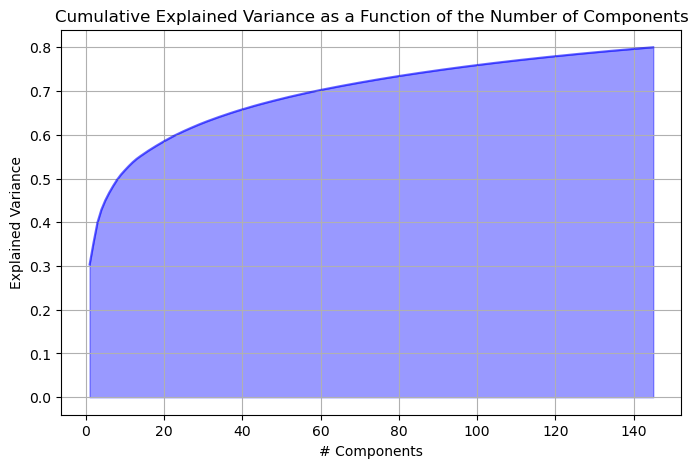

In [56]:
import matplotlib.pyplot as plt
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.fill_between(range(1, exp_var_cumul.shape[0] + 1), exp_var_cumul, color="blue", alpha=0.4)
plt.plot(range(1, exp_var_cumul.shape[0] + 1), exp_var_cumul, color="blue", alpha=0.6) 
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.xlabel('# Components')
plt.ylabel('Explained Variance')
plt.grid(True)

In [9]:
bow_embedding = pd.DataFrame(bow_df_pca).apply(lambda row: row.tolist(), axis=1)
bow_embedding_df = pd.concat([concatenated_comments, pd.DataFrame(bow_embedding)], axis = 1)
bow_embedding_df.columns.values[2] = "BOW_embedding"

In [31]:
bow_embedding_df

,user_id,text,BOW_embedding
0,1.000018e+20,Great food. The service was a little slow. It ...,"[-1.3322251176642164, 2.273819685005117, 1.985..."
1,1.000020e+20,I like the variety of burgers they offer. But ...,"[10.29148731742613, -4.420930268859397, -8.567..."
2,1.000027e+20,Margarita was yummy. Food not great.\nCrazy No...,"[-2.6008537544142865, 2.370196191927631, -3.57..."
3,1.000030e+20,Very good food a little pricey but worth every...,"[-1.9098802955132501, -2.9086978874441494, 0.5..."
4,1.000057e+20,Delightful and charming place to dine outside....,"[22.516289847034443, -2.740338698802675, -3.16..."
...,...,...,...
10980,1.184382e+20,Nice little place in Sudbury.Good prices and g...,"[-1.7003215671263872, -4.319781758397664, 8.42..."
10981,1.184401e+20,Over the phone order takes forever.\nReception...,"[-4.870188645033443, -0.7836920965320646, -4.1..."
10982,1.184433e+20,Was great food and service\nA little pricey fo...,"[10.952753305704062, 6.3846210005718556, 4.934..."
10983,1.184449e+20,Only came because we had a gift card. Reminded...,"[-9.209499269584088, -1.6524134964014876, -1.8..."


In [26]:
bow_embedding_df.to_csv("data/user_concat_text_10_20_BOW.csv", sep=';', index=False)
#pd.read_csv("data/user_concat_text_10_20_BOW.csv", sep = ";")